# Importing Necessary Libraries


In [1]:
# Uncomment below to install package
# !pip install scikit-learn

In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

# Reading and Preprocessing the Data


In [3]:
# Read in the data
nlsy = pd.read_csv('https://github.com/Mixtape-Sessions/Machine-Learning/blob/main/Labs/data/nlsy97.csv?raw=true')

# Generate dictionary of transformations of education
powerlist = [nlsy['educ']**j for j in np.arange(2, 5)]
X = pd.concat(powerlist, axis=1)
X.columns = ['educ' + str(j) for j in np.arange(2, 5)]

print(len(nlsy.columns))
nlsy = pd.concat([nlsy,X],axis=1)
print(len(nlsy.columns))

994
997


In [4]:
# Clean data frame
# Drop rows with missing values
# Always check documentation
print(len(nlsy))
condition = nlsy['cv_bio_mom_age_child1_1997'] < 0
nlsy_cleaned = nlsy.drop(nlsy[condition].index)
print(len(nlsy_cleaned))

1266
1237


In [5]:
# Standardize X's
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL'])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Pre-Analysis Decision
- Defining the choice set

In [6]:
# Can you identify variables with seemingly dummy/categorical/discrete variables?

In [7]:
# Assign the list of columns in the cols object
cols = nlsy.columns.to_list()
cols = list(nlsy.columns)
cols = [x for x in cols if x!="lnw_2016"]
cols[:5]

['educ', 'black', 'hispanic', 'other', 'exp']

In [8]:
# Find unique values
list(set(nlsy['black'])) # 'black' is a dummy variable indicating whether black

[0, 1]

In [9]:
nlsy['black'].unique()

array([0, 1], dtype=int64)

In [10]:
# Practice!
# Identify variables with more than three variations
continuous_var = []
for col in cols:
    if len(list(set(nlsy[col]))) > 3:
        continuous_var.append(col)

In [11]:
# , for assigning multiple values at once 
e1, e2 = 1, 2
print(e1)
print(e2)

1
2


In [12]:
# Alternatively
e1 = 1
e2 = 2

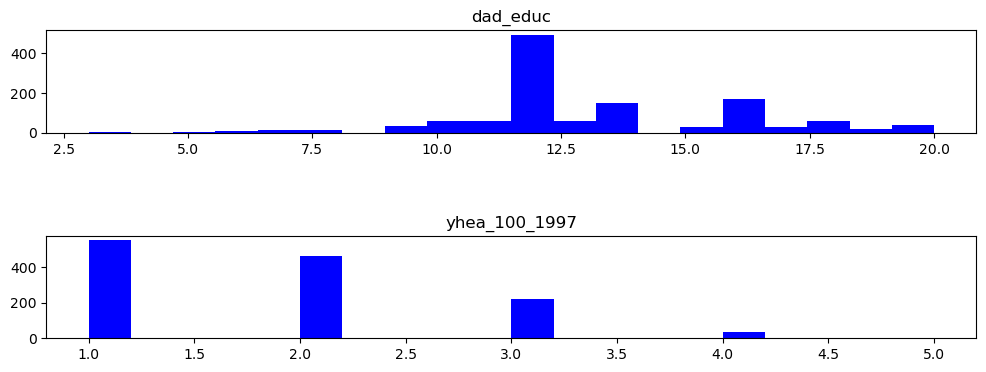

In [13]:
# Create a grid of subplots for histograms
fig,(ax11,ax21) = plt.subplots(2,1,figsize=(12, 4))
ax11.hist(nlsy[continuous_var[4]], bins=20, color='blue')
ax11.set_title(f'{continuous_var[4]}')
fig.subplots_adjust(hspace=1) 
ax21.hist(nlsy[continuous_var[5]], bins=20, color='blue')
ax21.set_title(f'{continuous_var[5]}')

plt.show()

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

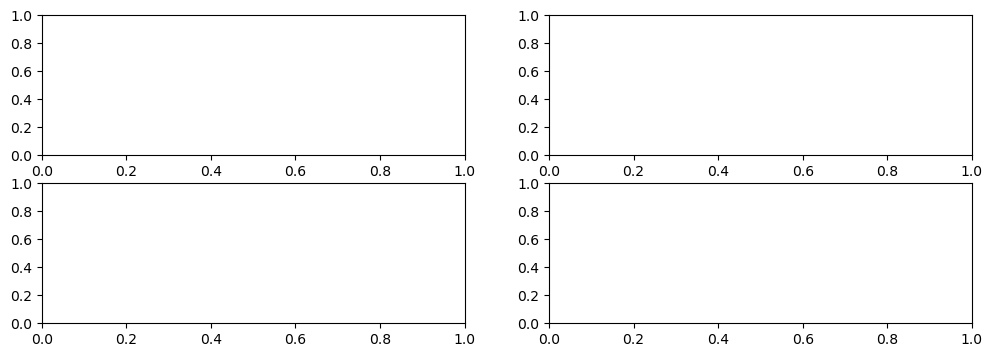

In [14]:
fig,axs= plt.subplots(2,2,figsize=(12, 4)) # Always assign an empty array first
axs

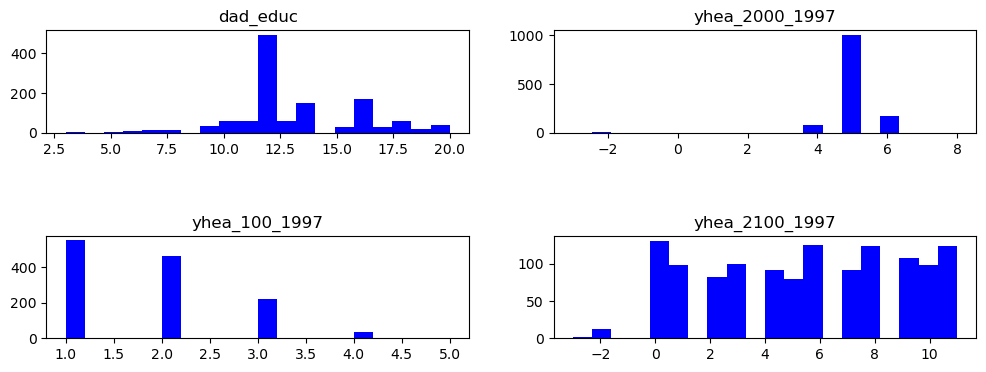

In [15]:
# Create a grid of subplots for histograms
fig,axs= plt.subplots(2,2,figsize=(12, 4))
axs[0,0].hist(nlsy[continuous_var[4]], bins=20, color='blue')
axs[0,0].set_title(f'{continuous_var[4]}')

axs[1,0].hist(nlsy[continuous_var[5]], bins=20, color='blue')
axs[1,0].set_title(f'{continuous_var[5]}')
fig.subplots_adjust(hspace=1) 
axs[0,1].hist(nlsy[continuous_var[6]], bins=20, color='blue')
axs[0,1].set_title(f'{continuous_var[6]}')

axs[1,1].hist(nlsy[continuous_var[7]], bins=20, color='blue')
axs[1,1].set_title(f'{continuous_var[7]}')

plt.show()

In [16]:
# Length of continuous_var
len(continuous_var)

90

In [17]:
# Sequentially assign element into a matrix
matrix = np.array(continuous_var).reshape(10, 9) # 10 rows and 9 columns
matrix[3,5]

'pc9_001_1997'

In [18]:
# Find the index of an element in a list
continuous_var.index('pc9_001_1997') 

32

In [19]:
# Relationship to matrix
continuous_var.index('pc9_001_1997') == 9*3 + 5

True

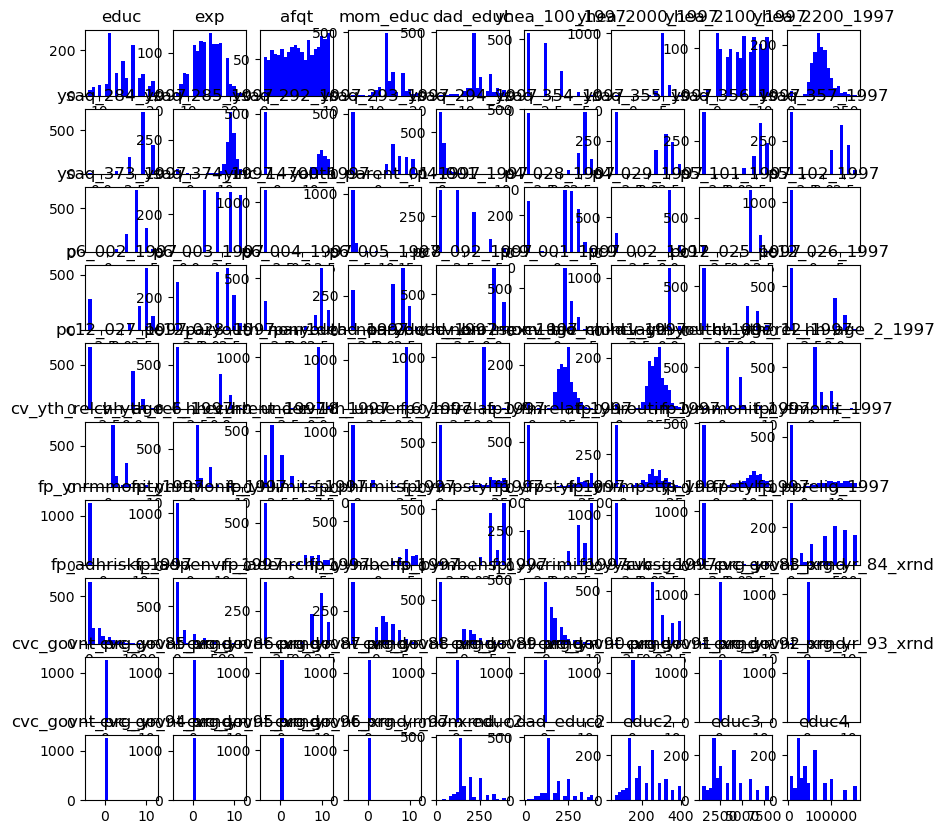

In [20]:
# Practice!
# Create a grid of subplots for histograms of all continuous_var
fig, axs = plt.subplots(10, 9, figsize=(10, 10))
matrix = np.array(continuous_var).reshape(10, 9)
for i in range(10):
    for j in range(9):
        axs[i, j].hist(nlsy[matrix[i, j]], bins=20, color='blue')
        axs[i, j].set_title(f'{matrix[i, j]}')
plt.show()

# Linear Regression Model


In [21]:
# Instantiate and fit the linear regression model
reg = linear_model.LinearRegression().fit(X_scaled, nlsy['lnw_2016'])

# Generate predicted values
yhat = reg.predict(X_scaled)
print(len(yhat),len(X_scaled),len(nlsy))
yhat[:5]

1266 1266 1266


array([4.07930363, 3.20503605, 2.45137394, 3.10353458, 4.48506535])

# Lasso Regression Model


In [22]:
X=nlsy[continuous_var].drop(columns=['exp'])

# Divide into training and test set so we can honestly gauge predictive accuracy
X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
# Scale regressors
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Do cross-validated Lasso (the easy way!)
# instantiate and fit our lassocv object
alphas = (.0001,.001,.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02)
lassocv=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_train_scaled,y_train)

# print out the chosen value for alpha
print("Chosen alpha: {:.3f}".format(lassocv.alpha_))
# print the original number of regressors and the number selected by lasso
print("Number of regressors in the menu: ",len(X.columns))
print("Number of regressors selected by lasso: ",sum(lassocv.coef_!=0))
# print out accuracy on training and test test
print("Accuracy on training set: {:.3f}".format(lassocv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(lassocv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[lassocv.coef_!=0],'coefficient': lassocv.coef_[lassocv.coef_!=0]})

Chosen alpha: 0.020
Number of regressors in the menu:  89
Number of regressors selected by lasso:  31
Accuracy on training set: 0.138
Accuracy on test set: 0.053


In [23]:
# Focus on covariates with continuous variations 
X=nlsy[continuous_var].drop(columns=['exp'])
# Divide into training and test set so we can honestly gauge predictive accuracy
X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
# Scale regressors
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridgecv=linear_model.RidgeCV(cv=5,alphas=(.1,1,10,50,100,1000)).fit(X_train_scaled,y_train)
print("Chosen alpha: {:.3f}".format(ridgecv.alpha_))
print("Accuracy on training set: {:.3f}".format(ridgecv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(ridgecv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[ridgecv.coef_!=0],'coefficient': ridgecv.coef_[ridgecv.coef_!=0]})

Chosen alpha: 1000.000
Accuracy on training set: 0.139
Accuracy on test set: 0.046


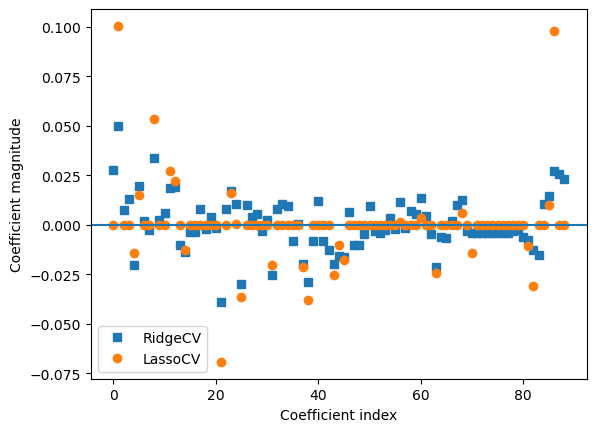

In [24]:
plt.plot(ridgecv.coef_, 's', label="RidgeCV")
plt.plot(lassocv.coef_, 'o', label="LassoCV")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.legend()

In [25]:
# Recall the example in Lecture 3
X=nlsy.drop(columns=['lnw_2016','exp'])

# Divide into training and test set so we can honestly gauge predictive accuracy
X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
# Scale regressors
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Do cross-validated Lasso (the easy way!)
# instantiate and fit our lassocv object
alphas = (.001,.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02)
lassocv=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_train_scaled,y_train)

# print out the chosen value for alpha
print("LASSO \n Chosen alpha: {:.3f}".format(lassocv.alpha_))
# print the original number of regressors and the number selected by lasso
print("Number of regressors in the menu: ",len(X.columns))
print("Number of regressors selected by lasso: ",sum(lassocv.coef_!=0))
# print out accuracy on training and test test
print("Accuracy on training set: {:.3f}".format(lassocv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(lassocv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[lassocv.coef_!=0],'coefficient': lassocv.coef_[lassocv.coef_!=0]})

# Focus on continuous variations
X=nlsy.drop(columns=['lnw_2016','exp'])
# Divide into training and test set so we can honestly gauge predictive accuracy
X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
# Scale regressors
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridgecv=linear_model.RidgeCV(cv=5,alphas=(.1,1,10,50,100,1000)).fit(X_train_scaled,y_train)
print("Ridge \n Chosen alpha: {:.3f}".format(ridgecv.alpha_))
print("Accuracy on training set: {:.3f}".format(ridgecv.score(X_train_scaled,y_train)))
print("Accuracy on test set: {:.3f}".format(ridgecv.score(X_test_scaled,y_test)))
# look at the coefficients
results = pd.DataFrame({'feature': X.columns[ridgecv.coef_!=0],'coefficient': ridgecv.coef_[ridgecv.coef_!=0]})

LASSO 
 Chosen alpha: 0.020
Number of regressors in the menu:  995
Number of regressors selected by lasso:  202
Accuracy on training set: 0.435
Accuracy on test set: 0.024
Ridge 
 Chosen alpha: 1000.000
Accuracy on training set: 0.488
Accuracy on test set: -0.041


# Loop through Pre-Analysis Decision

- Finding the best threshold

In [26]:
# The tentative threshold "3" could be iteratively evaluated
cols = [x for x in nlsy.columns.to_list() if x!="lnw_2016"]
continuous_var = []
for col in cols:
    if  len(list(set(nlsy[col]))) > 3:
        continuous_var.append(col)

In [27]:
# Practice!
# Find the best threshold of variations 
collect_diff = []
range_of_value = range(1,5)

In [28]:
# Practice!
# Loop through the accuracy model
cols = [x for x in nlsy.columns.to_list() if x!="lnw_2016"]
for variation in range_of_value: 
    continuous_var = []
    for col in cols:
        if  len(list(set(nlsy[col]))) >variation:
            continuous_var.append(col)
    X=nlsy[continuous_var]
    # Divide into training and test set so we can honestly gauge predictive accuracy
    X_train, X_test, y_train, y_test = train_test_split(X, nlsy['lnw_2016'],random_state=42)
    # Scale regressors
    scaler.fit(X_train)
    X_train_scaled = scaler.transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    alphas = (.001,.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02)
    lassocv=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_train_scaled,y_train)
    print(f"Unique Value Criteria is {variation}")
    print("Accuracy on training set: {:.3f}".format(lassocv.score(X_train_scaled,y_train)))
    print("Accuracy on test set: {:.3f}".format(lassocv.score(X_test_scaled,y_test)))
    collect_diff.append(lassocv.score(X_train_scaled,y_train)-lassocv.score(X_test_scaled,y_test))

print(f"The minimum testing accuracy loss is {min(collect_diff)} \n"  + 
      f"The threshold values for the minimum testing accuracy loss is {range_of_value[collect_diff.index(min(collect_diff))]}")

Unique Value Criteria is 1
Accuracy on training set: 0.436
Accuracy on test set: 0.026
Unique Value Criteria is 2
Accuracy on training set: 0.143
Accuracy on test set: 0.069
Unique Value Criteria is 3
Accuracy on training set: 0.139
Accuracy on test set: 0.052
Unique Value Criteria is 4
Accuracy on training set: 0.134
Accuracy on test set: 0.092
The minimum testing accuracy loss is 0.04117431126652238 
The threshold values for the minimum testing accuracy loss is 4


In [29]:
# Get the "best" choice set based on the results above
cols = [x for x in nlsy.columns.to_list() if x!="lnw_2016"]

continuous_var = []
for col in cols:
    if  len(list(set(nlsy[col]))) >range_of_value[collect_diff.index(min(collect_diff))]:
        continuous_var.append(col)

# Residualization

In [30]:
# Practice!
# Get y, d, X's 
# Standardize
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL'] 
X = nlsy[continuous_var]
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [31]:
# Practice!
# Run LASSO for y and d
lassocv=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,y)

# calculate residuals for y
ytilde = y - lassocv.predict(X)

lassocv_d=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,d)

# Calculate residuals d
dtilde = d - lassocv_d.predict(X)

In [32]:
# Linear projection of y tilde on d tilde
d_reshaped = dtilde.values.reshape(-1,1) # 1 dimensional array needs reshaping for regression packages
y_reshaped = ytilde.values.reshape(-1,1)
lm=linear_model.LinearRegression()
lm.fit(d_reshaped,y_reshaped)
lm.coef_

array([[0.08615492]])

In [33]:
# Get the standard deviations
import statsmodels.api as sm
import numpy as np

# Fit the linear model
d_reshaped = sm.add_constant(d_reshaped)
model = sm.OLS(y_reshaped, d_reshaped).fit(cov_type='HC3') # Robust standard errors

# Get the coefficients
coefficients = model.params
print("Coefficients:", coefficients)

# Get the standard errors
standard_errors = model.bse
print("Standard Errors:", standard_errors)

Coefficients: [-4.92949006  0.08615492]
Standard Errors: [0.5013181  0.00288524]


In [34]:
# How about a simple regression of Y on D
# reshape the 1 dimensional array
d_original = d.values.reshape(-1,1) 
d_original = sm.add_constant(d_original)
model = sm.OLS(y.values.reshape(-1,1),d_original).fit(cov_type='HC3')

# Get the coefficients
coefficients = model.params
print("Coefficients:", coefficients)

# Get the standard errors
standard_errors = model.bse
print("Standard Errors:", standard_errors)

Coefficients: [3.03684027 0.31231566]
Standard Errors: [0.02850781 0.05265685]


Reg $Y$ on $D$ and All $X$'s

In [35]:
# Practice!
# How about Y on D + X?
X = nlsy[continuous_var]
d_original = pd.concat([nlsy['mom_educCOLL'],X],axis=1)
d_original = sm.add_constant(d_original)
model = sm.OLS(y.values.reshape(-1,1),d_original).fit(cov_type='HC3')
# Get the coefficients
coefficients = model.params
print("Coefficients: {:.3f}".format(coefficients['mom_educCOLL']))

# Get the standard errors
standard_errors = model.bse
print("Standard Errors: {:.3f}".format(standard_errors['mom_educCOLL']))

Coefficients: 0.088
Standard Errors: 0.102


LASSO Reg $Y$ on $D$ and All $X$'s

In [36]:
# How about LASSO with all variables?
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL'] 
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL'])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [37]:
# Practice!
lassocv=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,y)

# calculate residual for
ytilde = y - lassocv.predict(X)

lassocv_d=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,d)

# Calculate residuals
dtilde = d - lassocv_d.predict(X)
d_reshaped = dtilde.values.reshape(-1,1) # 1 dimensional array needs reshaping for regression packages
y_reshaped = ytilde.values.reshape(-1,1)

In [38]:
# Practice!
# Fit the linear model
d_reshaped = sm.add_constant(d_reshaped)
model = sm.OLS(y_reshaped, d_reshaped).fit(cov_type='HC3')

# Get the coefficients
coefficients = model.params
print("Coefficients:", coefficients)

# Get the standard errors
standard_errors = model.bse
print("Standard Errors:", standard_errors)

Coefficients: [-0.52503185  0.01446476]
Standard Errors: [0.07637925 0.00105009]


In [39]:
# How about a simple regression with all variables?
y = nlsy['lnw_2016']
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL'])
d_original = pd.concat([nlsy['mom_educCOLL'],X],axis=1)
d_original = sm.add_constant(d_original)
model = sm.OLS(y.values.reshape(-1,1),d_original).fit(cov_type='HC3')
# Get the coefficients
coefficients = model.params
print("Coefficients:", coefficients['mom_educCOLL'])

# Get the standard errors
standard_errors = model.bse
print("Standard Errors:", standard_errors['mom_educCOLL'])

Coefficients: 0.0002848985126703285
Standard Errors: 0.24086612046753358


# K-fold cross validations by steps

In [40]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import numpy as np
import statsmodels.api as sm

# Assign variables
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']
X = nlsy[continuous_var]

# Scale the features
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [41]:
# Look inside the k-fold
[[x,y] for x,y in kf.split(X)]

[[array([   0,    1,    2, ..., 1262, 1263, 1264]),
  array([  10,   23,   29,   31,   43,   44,   49,   51,   54,   56,   58,
           63,   65,   70,   76,   78,   81,   86,   96,  101,  107,  109,
          113,  123,  128,  135,  140,  147,  155,  158,  163,  168,  170,
          174,  184,  192,  196,  198,  199,  208,  209,  210,  218,  220,
          221,  231,  233,  240,  243,  244,  247,  254,  259,  261,  270,
          282,  286,  289,  290,  294,  296,  297,  298,  303,  306,  308,
          309,  312,  327,  328,  331,  332,  333,  342,  344,  346,  350,
          352,  355,  363,  367,  371,  374,  381,  382,  390,  405,  409,
          411,  413,  415,  422,  424,  427,  435,  442,  447,  453,  462,
          464,  471,  481,  485,  486,  490,  493,  513,  522,  527,  528,
          529,  532,  533,  534,  541,  543,  548,  552,  554,  561,  573,
          575,  579,  581,  583,  588,  591,  597,  599,  609,  615,  620,
          621,  624,  626,  631,  634,  643,  65

In [42]:
[[len(x),len(y)] for x,y in kf.split(X)]

[[1012, 254], [1013, 253], [1013, 253], [1013, 253], [1013, 253]]

In [43]:
# Assign alphas and results storage
alphas = (.001, .002, .004, .006, .008, .01, .012, .014, .016, .018, .02)
best_alpha_y = 0
best_alpha_d = 0
best_mse_y = float('inf') # Assign type of a null value capable of any minimum values
best_mse_d = float('inf')

In [44]:
type(best_mse_y)

float

In [45]:
# Practice!
# Loop through each fold
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    d_train, d_test = d.iloc[train_index], d.iloc[test_index]
    
    for alpha in alphas:
        # Fit Lasso for y
        lasso_y = Lasso(alpha=alpha)
        lasso_y.fit(X_train, y_train)
        mse_y = mean_squared_error(y_test, lasso_y.predict(X_test))
        
        # Practice!
        # Fit Lasso for d
        lasso_d = Lasso(alpha=alpha)
        lasso_d.fit(X_train, d_train)
        mse_d = mean_squared_error(d_test, lasso_d.predict(X_test))
        
        # Practice!
        # Update best alpha and mse for y
        if mse_y < best_mse_y:
            best_mse_y = mse_y
            best_alpha_y = alpha
            
        # Update best alpha and mse for d
        if mse_d < best_mse_d:
            best_mse_d = mse_d
            best_alpha_d = alpha



In [46]:
# Fit the final models with the best alphas
lasso_y_final = Lasso(alpha=best_alpha_y).fit(X_scaled, y)
lasso_d_final = Lasso(alpha=best_alpha_d).fit(X_scaled, d)

# Calculate residuals
ytilde = y - lasso_y_final.predict(X_scaled)
dtilde = d - lasso_d_final.predict(X_scaled)

# Your existing code for OLS regression with residuals can follow here
d_reshaped = dtilde.values.reshape(-1,1) # 1 dimensional array needs reshaping for regression packages
y_reshaped = ytilde.values.reshape(-1,1)

d_reshaped = sm.add_constant(d_reshaped)
model = sm.OLS(y_reshaped, d_reshaped).fit(cov_type='HC3')

# Get the coefficients
coefficients = model.params

print("Coefficients: {:.3f}".format(coefficients[1]))

# Get the standard errors
standard_errors = model.bse
print("Standard Errors: {:.3f}".format(standard_errors[1]))

Coefficients: 0.094
Standard Errors: 0.098


---

# More on Sample Spliting 
Practice with Race

In [47]:
#%% What if I want to separate out the training/testing sets based on race?
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Create a sample DataFrame with 1266 observations and a 'race' column
# Replace this with your actual DataFrame
# Filter the DataFrame based on race
nlsy_hispanic = nlsy[nlsy['hispanic'] == 1]
nlsy_black = nlsy[nlsy['black'] == 1]
condition = (nlsy['hispanic'] != 1)&(nlsy['black'] != 1)
nlsy_other = nlsy[condition]

In [48]:
# What does logical expression do?
[False]*5

[False, False, False, False, False]

In [49]:
arbitrary = [False]*(150) + [True]*300 + [False]*(len(nlsy)-150-300)
arbitrary[140], arbitrary[400], arbitrary[650]

(False, True, False)

In [50]:
nlsy[arbitrary]

,lnw_2016,educ,black,hispanic,other,exp,afqt,mom_educ,dad_educ,yhea_100_1997,...,_XPexp_17,_XPexp_18,_XPexp_19,_XPexp_20,_XPexp_21,_XPexp_22,_XPexp_23,educ2,educ3,educ4
150,2.073957,13,0,0,0,14,3.1729,12,11,2,...,0,0,0,0,0,0,0,169,2197,28561
151,2.837589,12,0,0,0,18,3.8047,12,13,1,...,0,1,0,0,0,0,0,144,1728,20736
152,3.877471,20,0,0,0,11,9.9608,20,20,1,...,0,0,0,0,0,0,0,400,8000,160000
153,3.525250,12,0,0,0,19,2.2265,16,16,3,...,0,0,1,0,0,0,0,144,1728,20736
154,3.733877,18,0,0,0,12,9.5219,16,17,1,...,0,0,0,0,0,0,0,324,5832,104976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2.572160,17,1,0,0,12,8.5277,16,16,1,...,0,0,0,0,0,0,0,289,4913,83521
446,2.426638,16,0,0,0,12,7.2542,16,18,2,...,0,0,0,0,0,0,0,256,4096,65536
447,3.612592,20,0,0,0,10,9.3123,19,12,2,...,0,0,0,0,0,0,0,400,8000,160000
448,3.746140,11,0,0,0,18,5.6232,10,11,4,...,0,1,0,0,0,0,0,121,1331,14641


In [51]:
len(list(set(nlsy.dad_educ)))

18

In [52]:
# Perform train/test split for each racial group
X_train_hispanic, X_test_hispanic, y_train_hispanic, y_test_hispanic = train_test_split(nlsy_hispanic.drop(['lnw_2016','mom_educCOLL'], axis=1), nlsy_hispanic['lnw_2016'], test_size=0.5, random_state=0)
X_train_black, X_test_black, y_train_black, y_test_black = train_test_split(nlsy_black.drop(['lnw_2016','mom_educCOLL'], axis=1), nlsy_black['lnw_2016'], test_size=0.5, random_state=0)
X_train_other, X_test_other, y_train_other, y_test_other = train_test_split(nlsy_other.drop(['lnw_2016','mom_educCOLL'], axis=1), nlsy_other['lnw_2016'], test_size=0.5, random_state=0)

# Combine the train sets and test sets to get the final train and test sets
X_train = pd.concat([X_train_hispanic, X_train_black, X_train_other])
X_test = pd.concat([X_test_hispanic, X_test_black, X_test_other])
y_train = pd.concat([y_train_hispanic, y_train_black, y_train_other])
y_test = pd.concat([y_test_hispanic, y_test_black, y_test_other])

In [53]:
len(X_train),len(X_test),len(y_train),len(y_test)

(633, 633, 633, 633)

In [54]:
# Practice!
# Perform train/test split for dad's education level (dad_educ)
dads = list(set(nlsy.dad_educ))
dads.sort()
xtrains = []
xtests = []
ytrains = []
ytests = []
for dad in dads:
    subset = nlsy[nlsy['dad_educ'] == dad]
    xtrain, xtest, ytrain, ytest = train_test_split(subset.drop(['lnw_2016'], axis=1), subset['lnw_2016'], test_size=0.5, random_state=0)
    xtrains.append(xtrain)
    xtests.append(xtest)
    ytrains.append(ytrain)
    ytests.append(ytest)

In [55]:
# Combine the train sets and test sets to get the final train and test sets
X_train = pd.concat(xtrains)
X_test = pd.concat(xtests)
y_train = pd.concat(ytrains)
y_test = pd.concat(ytests)

In [56]:
# Practice?

---

## Post Double Selection Lasso
- Belloni, Chernozhukov, Hansen

**PDS is implemented in three steps:**
1. Lasso $Y_i$ on $X_i$, collect retained features in $X_i^Y$
2. Lasso $D_i$ on $X_i$, collect retained features in $X_i^D$
3. Regress $Y_i$ on $D_i$ and $X_i^Y \cup X_i^D$

*Caveats and considerations:*
- Standardizing controls pre-lasso is important
- BCH have a formula for the penalty parameter, but cross-validation seems to work just fine
- Inference: just use robust SEs from last step!

### Step 1: Lasso the outcome on X

In [57]:
# Practice!
# Assign values on y, d, X and standardize X
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL'] 
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL'])
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
alphas = (.001,.002, .004, .006, .008, .01, .012, .014, .016 ,.018, .02)
lassoy=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,y)

In [58]:
# Check what it looks like!

### Step 2: Lasso the treatment on X

In [59]:
# Practice!
# Assign y, d, X
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL'] 
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL'])
# Standardize X
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
# Initiate LassoCV model
lassod=linear_model.LassoCV(cv=5,alphas=alphas,random_state=42).fit(X_scaled,d)

In [60]:
# Check what it looks like!

### Step 3: Form the union of controls

In [61]:
Xunion=X.iloc[:,(lassod.coef_!=0) + (lassoy.coef_!=0)]
Xunion.head()

,educ,black,hispanic,other,exp,afqt,ysaq_284_1997,ysaq_373_1997,youth_nonr1dead_01_1997,p4_001_1997,...,_BGhp5_101__5,_BGhp5_102__3,_BGhp5_102__7,_BGhcvc_govp6,_BGhcvc_govq4,_XPexp_9,_XPexp_14,_XPexp_20,_XPexp_21,_XPexp_22
0,16,0,0,0,11,7.0724,3,3,0,2,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,19,4.7481,4,3,0,1,...,0,0,0,0,0,0,0,0,0,0
2,9,0,1,0,22,1.1987,4,4,0,3,...,0,0,0,0,0,0,0,0,0,1
3,16,0,0,0,13,8.9321,3,3,0,2,...,0,0,0,0,0,0,0,0,0,0
4,16,0,1,0,15,2.2618,4,3,0,2,...,0,0,0,0,0,0,0,0,0,0


### Concatenate treatment with union of controls and regress y on that and print out estimate

In [62]:
# Practice!
rhs=pd.concat([d,Xunion],axis=1)
fullreg=linear_model.LinearRegression().fit(rhs,y)
print("PDS regression earnings mom's college gap: {:.3f}".format(fullreg.coef_[0]))

PDS regression earnings mom's college gap: 0.047


---

## Random Forest

In [63]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL']) 
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

# First without cross-validating
rf=RandomForestRegressor(random_state=42).fit(X_train,y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test,y_test)))

# Now with cross-validation
# define grid for max_depth
param_grid = {'max_depth': [3,5,10]}
grid_searchrf = GridSearchCV(RandomForestRegressor(),param_grid,cv=5,return_train_score=True).fit(X_train,y_train)
print("Best max_depth: ",grid_searchrf.best_estimator_.get_params()['max_depth'])
print("Accuracy on training set: {:.3f}".format(grid_searchrf.score(X_train,y_train)))
print("Accuracy on test set: {:.3f}".format(grid_searchrf.score(X_test,y_test)))

Accuracy on training set: 0.868
Accuracy on test set: 0.037
Best max_depth:  3
Accuracy on training set: 0.238
Accuracy on test set: 0.044


# Residualization

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
import numpy as np
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL']) 
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
d_train, d_test = d[X_train.index], d[X_test.index]

# Create a Random Forest Classifier with max_depth=3
rf_y = RandomForestRegressor(max_depth=3, random_state=42)
rf_d = RandomForestRegressor(max_depth=3, random_state=42)

# Train the classifier on the training data
rf_y.fit(X_train, y_train)
rf_d.fit(X_train, d_train)

# Calculate residuals for y 
y_residual = y_test - rf_y.predict(X_test)

# Calculate residuals for d on entire data
d_residual = d_test - rf_d.predict(X_test)

# Run a linear regression of the residualized y on the residualized d
lr = LinearRegression()
lr.fit(d_residual.values.reshape(-1, 1), y_residual.values.reshape(-1, 1))

# Coefficient for residualized d
print("Coefficient for residualized d:", lr.coef_[0][0])


Coefficient for residualized d: 0.0


In [65]:
list(set(d_residual))

[0.0]

## Average K-fold

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
import numpy as np
X = nlsy.drop(columns=['lnw_2016','mom_educCOLL']) 
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [67]:
# Practice!
# Initialize Random Forest Regressor
rf_y = RandomForestRegressor(random_state=0)
rf_d = RandomForestRegressor(random_state=0)

# Initialize Linear Regression
lr = LinearRegression()

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

In [68]:
# Initialize GridSearchCV
param_grid = {'max_depth': [3,5,10]}
grid_search_y = GridSearchCV(estimator=rf_y, param_grid=param_grid, cv=kf, n_jobs=-1)
grid_search_d = GridSearchCV(estimator=rf_d, param_grid=param_grid, cv=kf, n_jobs=-1)

In [69]:
# Practice!
# Initialize storage for coefficients
coefficients = []

# Loop through each fold
for train_index, test_index in kf.split(X_train):
    # Practice!
    # Split data into training and test sets
    # Use train_index, and test_index
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    d_train_fold, d_test_fold = d.iloc[train_index], d.iloc[test_index]

    # Fit GridSearchCV for y and d
    grid_search_y.fit(X_train_fold, y_train_fold)
    grid_search_d.fit(X_train_fold, d_train_fold)

    # Get the best estimator
    best_rf_y = grid_search_y.best_estimator_
    best_rf_d = grid_search_d.best_estimator_

    # Calculate residuals for y on test data
    y_residual = y_test_fold - best_rf_y.predict(X_test_fold)

    # Calculate residuals for d on entire data
    d_residual = d_test_fold - best_rf_d.predict(X_test_fold)

    # Run a linear regression of the residualized y on the residualized d
    lr.fit(d_residual.values.reshape(-1, 1), y_residual.values.reshape(-1, 1))

    # Store coefficient for residualized d
    coefficients.append(lr.coef_[0][0])

# Average coefficient across all folds
avg_coefficient = np.mean(coefficients)

print("Average Coefficient for residualized d:", avg_coefficient)


Average Coefficient for residualized d: 0.06678205068531232


---

## Double/de-biased machine learning (DML): Preliminaries
- Chernozhukov, Chetverikov, Demirer, Duflo, Hansen, Newey, Robins

### DML strategy:

1. Predict $Y_i$ on $X_i$ with ML and compute the residuals,
$\tilde{Y_i} = Y_i − Y_i^{\text{ML}}$, where
$Y_i^{\text{ML}} = $ prediction generated by ML

2. Predict $D_i$ on $X_i$ with ML and compute the residuals,
$\tilde{D_i} = D_i - D_i^{\text{ML}}$, where $D_i^{\text{ML}} = $ prediction generated by ML

3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

$Y_i^{\text{DML}}$ and $D_i^{\text{DML}}$ should be predictions generated by a machine learning model trained on a set of observations that does not include i.

**Recipe:**

1. Divide the sample into K folds
2. For k = 1, .... ,K
> - Train a model to predict $Y$ given $X$, leaving out observations i in fold k: $\hat{Y}^{-k}(x)$ 
> - Train a model to predict D given X, leaving out observations i in fold k: $\hat{D}^{-k}(x)$
> - Form residuals $\tilde{Y_i}$ = $Y_i$ - $\hat{Y}^{-k}(x)$ and $\tilde{D_i}$ = $D_i$ - $\hat{D}^{-k}(x)$
3. Regress $\tilde{Y_i}$ on $\tilde{D_i}$.

**Caveats and considerations:**

- Cross-validation to choose tuning parameters
- Inference: use robust SEs from last step

For simplicity, we will first do it without sample splitting

### Step 1: Ridge outcome on Xs, get residuals
Try yourself

In [70]:
# Define features and target variables
X = nlsy.drop(columns=['lnw_2016', 'mom_educCOLL'])  
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ridgey = linear_model.RidgeCV().fit(X_scaled, y)
yresid=y-ridgey.predict(X)

### Step 2: Ridge treatment on Xs, get residuals
Try yourself

In [71]:
ridged = linear_model.RidgeCV().fit(X_scaled, d)
dresid=d-ridged.predict(X)

### Step 3: Regress y resids on d resids and print out estimate
Try yourself

In [72]:
dresid = dresid.values.reshape(-1,1)
yresid = yresid.values.reshape(-1,1)
dmlreg=linear_model.LinearRegression().fit(dresid,yresid)
print("DML regression earnings mom's college gap: {:.3f}".format(dmlreg.coef_[0][0]))

DML regression earnings mom's college gap: 18.284


### The real thing: with sample splitting

In [73]:
# Define features and target variables
X = nlsy.drop(columns=['lnw_2016', 'mom_educCOLL'])  
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# create our sample splitting "object"
kf = KFold(n_splits=5,shuffle=True,random_state=42)

# apply the splits to our Xs
kf.get_n_splits(X)

# initialize columns for residuals
yresid = y*0
dresid = d*0

# X_train, X_test, y_train, y_test = train_test_split(X_scaled, nlsy['lnw_2016'],random_state=42)
X_scaled= pd.DataFrame(X_scaled)

In [74]:
# Now loop through each fold
ii=0
for train_index, test_index in kf.split(X):
    X_train, X_test = X_scaled.iloc[train_index,:], X_scaled.iloc[test_index,:]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    d_train, d_test = d.iloc[train_index], d.iloc[test_index]
 
    # Do DML thing
    # Ridge y on training folds:
    ridgey.fit(X_train, y_train)

    # but get residuals in test set
    yresid.iloc[test_index]=y_test-ridgey.predict(X_test)

    #Ridge d on training folds
    ridged.fit(X_train, d_train)

    #but get residuals in test set
    dresid.iloc[test_index]=d_test-ridged.predict(X_test)

In [75]:
# Regress resids
dresid = dresid.values.reshape(-1,1)
yresid = yresid.values.reshape(-1,1)
dmlreg=linear_model.LinearRegression().fit(dresid,yresid)

print("DML regression earnings mom's college gap: {:.3f}".format(dmlreg.coef_[0][0]))

DML regression earnings mom's college gap: 0.068


**What I hope you've gotten out of the last couple of days:**
- Clarity on distinction between predictive and causal questions
- Foot in the door with python implementations of some common modern supervised machine learning methods
- Tools for using ML methods to control for high dimensional covariates in the service of causal inference

**Preview for future workshops:**
- Use ML to predict heterogeneous treatment effects (e.g., random causal forests)
- ML and instrumental variables

---

# Neural Network

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

# Define features and target variables
X = nlsy[continuous_var] 
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize neural network
nn = MLPRegressor(hidden_layer_sizes=(5,), max_iter=500, random_state=42)

# Initialize variables to store residuals
y_residuals = np.zeros(y.shape)
d_residuals = np.zeros(d.shape)

# Perform cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    d_train, d_test = d.iloc[train_index], d.iloc[test_index]
    
    # Train neural network for y
    nn.fit(X_train, y_train)
    y_pred = nn.predict(X_test)
    y_residuals[test_index] = y_test - y_pred
    
    # Train neural network for d
    nn.fit(X_train, d_train)
    d_pred = nn.predict(X_test)
    d_residuals[test_index] = d_test - d_pred

# Run linear regression of residualized y on d
lin_reg = LinearRegression()
lin_reg.fit(d_residuals.reshape(-1, 1), y_residuals)
print(f"Coefficient for residualized d on y: {lin_reg.coef_[0]}")

Coefficient for residualized d on y: 0.24671806600385635


# Ensemble

In [77]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

X = nlsy[continuous_var]
y = nlsy['lnw_2016']
d = nlsy['mom_educCOLL']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter grids
rf_params = {'n_estimators': [50, 100], 'max_depth': [None, 5, 10, 20]}
ridge_params = {'alpha': [0.1, 1.0, 10.0, 100]}

In [78]:
# Initialize GridSearchCV for each model
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5)
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5)

# Fit GridSearchCV to find the best Random Forest and Ridge models
rf_grid.fit(X, y)
ridge_grid.fit(X_scaled, y)

# Get the best models
best_rf = rf_grid.best_estimator_
best_ridge = ridge_grid.best_estimator_

In [79]:
# Make predictions using the best models
rf_pred = best_rf.predict(X)
ridge_pred = best_ridge.predict(X_scaled)

# Ensemble the predictions (average)
ensemble_pred = (rf_pred + ridge_pred) / 2

# Calculate MSE for each model and the ensemble
rf_mse = mean_squared_error(y, rf_pred)
ridge_mse = mean_squared_error(y, ridge_pred)
ensemble_mse = mean_squared_error(y, ensemble_pred)


In [80]:
# Create a dictionary to store the MSE for each model
mse_dict = {'rf': rf_mse, 'ridge': ridge_mse, 'ensemble': ensemble_mse}

# Find the model with the minimum MSE
best_model = min(mse_dict, key=mse_dict.get)
best_model

'rf'

In [81]:
# Calculate residuals for y and d based on the best model
if best_model == 'ensemble':
    y_residual = y - ensemble_pred
    d_residual = d - ensemble_pred  # Assuming d is also a target variable
elif best_model == 'rf':
    y_residual = y - rf_pred
    d_residual = d - rf_pred  # Assuming d is also a target variable
else:  # best_model == 'ridge'
    y_residual = y - ridge_pred
    d_residual = d - ridge_pred  # Assuming d is also a target variable

print(f"Best model based on MSE: {best_model}")
print(f"Residuals for y and d calculated based on the best model.")


Best model based on MSE: rf
Residuals for y and d calculated based on the best model.


In [82]:
y_residual = y_residual.values.reshape(-1,1)
d_residual = d_residual.values.reshape(-1,1)

In [83]:
# Run the residualized regression

Can you tell the three different uses of K-fold sample splitting in the lecture?

1. Find Hyperparameter/undetermined values
2. Average Coefficients
3. Aggregate Separate Residuals

---

# Set aside a validation set


In [84]:
# Practice!
# Hint: X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.5, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.5, random_state=0)